In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from fooof import FOOOF
from lagged_coherence import *

In [7]:
f=h5py.File('epochs_target_on_session0920.mat', 'r')
data=np.array(f['target_on_epoch']).T


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 8 - 60 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

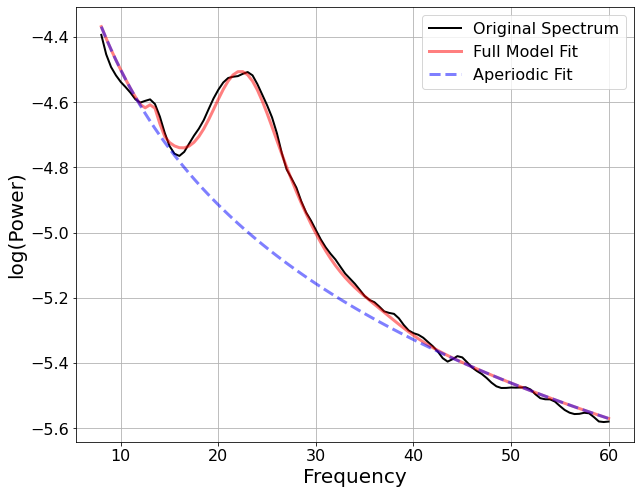

In [8]:
freqs=np.linspace(5,100,100)
f,psd=scipy.signal.welch(data, fs=1000, window='hann', 
                       nperseg=1000, noverlap=500, nfft=2000, detrend='constant', 
                       return_onesided=True, scaling='density', axis=- 1, average='mean')
f_idx=(f>=freqs[0]) & (f<=freqs[-1])
f=f[f_idx]
psd=np.mean(psd[:,f_idx],axis=0)

fm=FOOOF(peak_threshold=.9)
fm.report(f,psd,[8,60])

In [9]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,7,50)
lc_surrogate=lagged_surrogate_coherence(data, freqs, lags, 1000)
lc_classic=lagged_coherence_classic(data, freqs, lags, 1000)

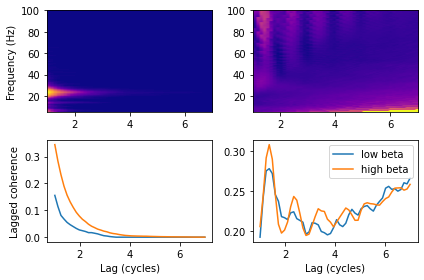

In [13]:
low_frange=np.where((freqs>=12) & (freqs<=14))[0]
high_frange=np.where((freqs>=15) & (freqs<=30))[0]

plt.figure()
plt.subplot(2,2,1)
i1=plt.imshow(np.mean(lc_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,2)
i1=plt.imshow(np.mean(lc_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.subplot(2,2,3)
plt.plot(lags,np.nanmean(np.nanmean(lc_surrogate[:,low_frange,:],axis=1),axis=0),label='low beta')
plt.plot(lags,np.nanmean(np.nanmean(lc_surrogate[:,high_frange,:],axis=1),axis=0),label='high beta')
plt.ylabel('Lagged coherence')
plt.xlabel('Lag (cycles)')
plt.subplot(2,2,4)
plt.plot(lags,np.nanmean(np.nanmean(lc_classic[low_frange,:],axis=1),axis=0),label='low beta')
plt.plot(lags,np.nanmean(np.nanmean(lc_classic[high_frange,:],axis=1),axis=0),label='high beta')
plt.xlabel('Lag (cycles)')
plt.legend()
plt.tight_layout()

In [12]:
lplv_surrogate=lagged_surrogate_coherence(data, freqs, lags, 1000, type='plv')
lplv_classic=lagged_coherence_classic(data, freqs, lags, 1000, type='plv')

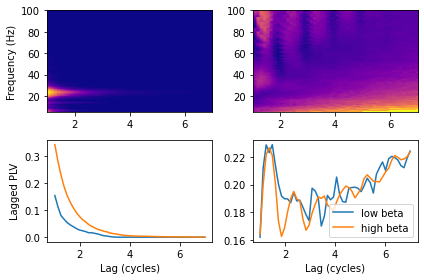

In [14]:
low_frange=np.where((freqs>=12) & (freqs<=14))[0]
high_frange=np.where((freqs>=15) & (freqs<=30))[0]

plt.figure()
plt.subplot(2,2,1)
i1=plt.imshow(np.mean(lplv_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,2)
i1=plt.imshow(np.mean(lplv_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.subplot(2,2,3)
plt.plot(lags,np.nanmean(np.nanmean(lplv_surrogate[:,low_frange,:],axis=1),axis=0),label='low beta')
plt.plot(lags,np.nanmean(np.nanmean(lplv_surrogate[:,high_frange,:],axis=1),axis=0),label='high beta')
plt.ylabel('Lagged PLV')
plt.xlabel('Lag (cycles)')
plt.subplot(2,2,4)
plt.plot(lags,np.nanmean(np.nanmean(lplv_classic[low_frange,:],axis=1),axis=0),label='low beta')
plt.plot(lags,np.nanmean(np.nanmean(lplv_classic[high_frange,:],axis=1),axis=0),label='high beta')
plt.xlabel('Lag (cycles)')
plt.legend()
plt.tight_layout()

In [15]:
lac_surrogate=lagged_surrogate_coherence(data, freqs, lags, 1000, type='amp_coh')
lac_classic=lagged_coherence_classic(data, freqs, lags, 1000, type='amp_coh')

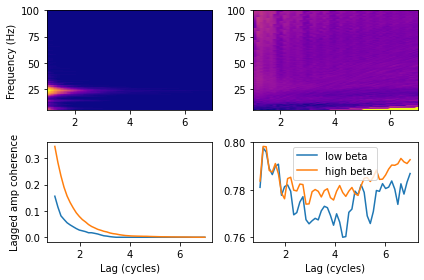

In [16]:
low_frange=np.where((freqs>=12) & (freqs<=14))[0]
high_frange=np.where((freqs>=15) & (freqs<=30))[0]

plt.figure()
plt.subplot(2,2,1)
i1=plt.imshow(np.mean(lac_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,2)
i1=plt.imshow(np.mean(lac_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.subplot(2,2,3)
plt.plot(lags,np.nanmean(np.nanmean(lac_surrogate[:,low_frange,:],axis=1),axis=0),label='low beta')
plt.plot(lags,np.nanmean(np.nanmean(lac_surrogate[:,high_frange,:],axis=1),axis=0),label='high beta')
plt.ylabel('Lagged amp coherence')
plt.xlabel('Lag (cycles)')
plt.subplot(2,2,4)
plt.plot(lags,np.nanmean(np.nanmean(lac_classic[low_frange,:],axis=1),axis=0),label='low beta')
plt.plot(lags,np.nanmean(np.nanmean(lac_classic[high_frange,:],axis=1),axis=0),label='high beta')
plt.xlabel('Lag (cycles)')
plt.legend()
plt.tight_layout()

In [ ]:
# plt.figure(figsize=(4,20))
# for lag in range(1,8):
#     plt.subplot(7,1,lag)
#     lag_idx=np.argmin(np.abs(lags-lag))
#     plt.plot(f,psd/np.max(psd),label='power')
#     lc_norm=np.mean(lc_surrogate,axis=0)/np.max(np.mean(lc_surrogate,axis=0))
#     plt.plot(freqs,lc_norm[:,lag_idx],label='new LC')
#     lc_norm=lc_classic/np.max(lc_classic)
#     plt.plot(freqs,lc_norm[:,lag_idx],label='LC classic')
#     plt.legend()
#     plt.xlabel('Frequency (Hz)')